In [185]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA

In [187]:
df = pd.read_csv("heart_cleveland_upload.csv")

In [189]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  condition  
0        1   1     0          0  
1        0   2     0          0  
2        2   0     0          0  
3        1   1     0          1  
4        1   0     0          0  
..     ...  ..   ...        ...  
292      0   0     2          1  
293      1   0     2          1  
294      1   0     2          1  
295      0   0     0          0  
296      0   0     2          1  

[297 rows x 14 columns]

In [191]:
df.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  condition  
0        1   1     

# Data Visualization

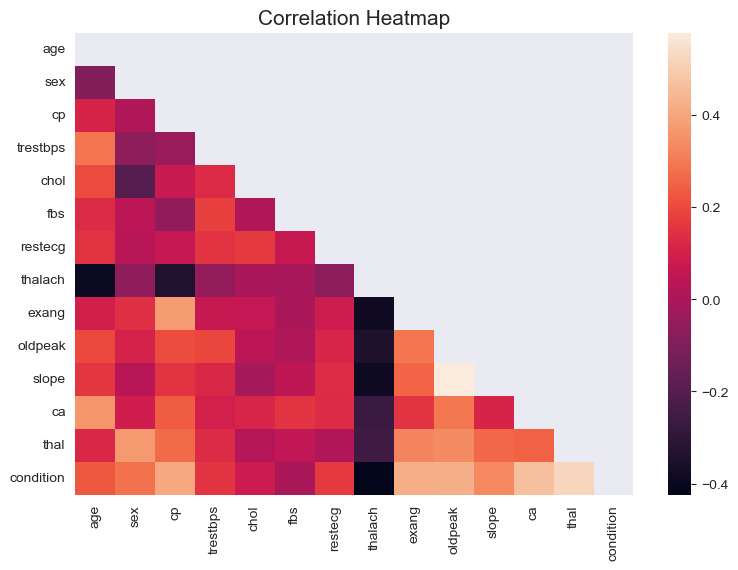

In [194]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(9, 6))
sns.heatmap(corr, mask=mask)
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

# Pre-Processing

In [197]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [199]:
df = df.drop(columns = ['condition'])
##standardization
standardized_df = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df),columns = df.columns)
standardized_df.head()

age       sex        cp  trestbps      chol       fbs   restecg  \
0  1.600302  0.691095 -2.240629  1.596266 -0.257179  2.430427  1.010199   
1  1.600302 -1.446980 -2.240629  0.468418 -0.160859 -0.411450 -1.003419   
2  1.268242 -1.446980 -2.240629  1.032342 -0.411292 -0.411450 -1.003419   
3  1.157555  0.691095 -2.240629  0.355633  0.667499  2.430427  1.010199   
4  1.046868  0.691095 -2.240629 -1.223355 -0.700254 -0.411450  1.010199   

    thalach     exang   oldpeak     slope        ca      thal  
0 -0.812095 -0.696419 -0.820813  0.643781  0.344824 -0.874292  
1  0.061157 -0.696419  0.639470 -0.976583  1.411625 -0.874292  
2 -1.554358 -0.696419  1.326662  2.264145 -0.721976 -0.874292  
3  1.065396 -0.696419  0.295874  0.643781  0.344824 -0.874292  
4 -0.244481  1.435916  0.639470  0.643781 -0.721976 -0.874292

In [201]:
corr = df.corr()
print(corr)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.092399  0.110471  0.290476  0.202644  0.132062   
sex      -0.092399  1.000000  0.008908 -0.066340 -0.198089  0.038850   
cp        0.110471  0.008908  1.000000 -0.036980  0.072088 -0.057663   
trestbps  0.290476 -0.066340 -0.036980  1.000000  0.131536  0.180860   
chol      0.202644 -0.198089  0.072088  0.131536  1.000000  0.012708   
fbs       0.132062  0.038850 -0.057663  0.180860  0.012708  1.000000   
restecg   0.149917  0.033897  0.063905  0.149242  0.165046  0.068831   
thalach  -0.394563 -0.060496 -0.339308 -0.049108 -0.000075 -0.007842   
exang     0.096489  0.143581  0.377525  0.066691  0.059339 -0.000893   
oldpeak   0.197123  0.106567  0.203244  0.191243  0.038596  0.008311   
slope     0.159405  0.033345  0.151079  0.121172 -0.009215  0.047819   
ca        0.362210  0.091925  0.235644  0.097954  0.115945  0.152086   
thal      0.120795  0.370556  0.266275  0.130612  0.023441  0.05

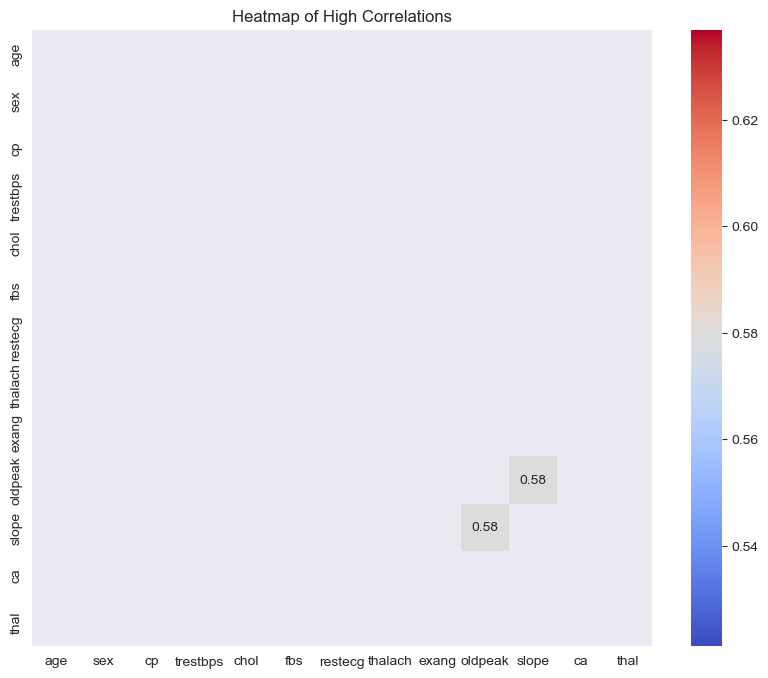

In [203]:
threshold = 0.5

high_corr = corr[(corr.abs() > threshold) & (corr != 1.0)]

plt.figure(figsize=(10, 8))
sns.heatmap(high_corr, annot=True, cmap="coolwarm", mask=high_corr.isnull())
sns.set_style('dark')
plt.title("Heatmap of High Correlations")
plt.show()

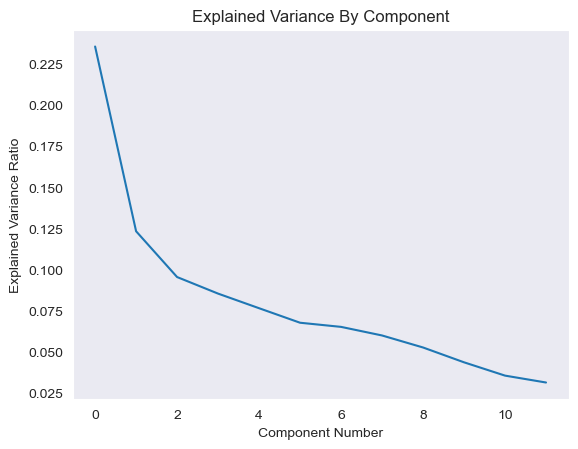

In [205]:
pca = PCA(n_components=0.95)
pca.fit(standardized_df)

plt.plot(pca.explained_variance_ratio_) 

plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance By Component')

plt.show()

In [207]:
pca = PCA(n_components = 3, random_state = 17) 
pca_df = pd.DataFrame(pca.fit_transform(standardized_df))
pca_df.shape

(297, 3)

# K-Means Clustering

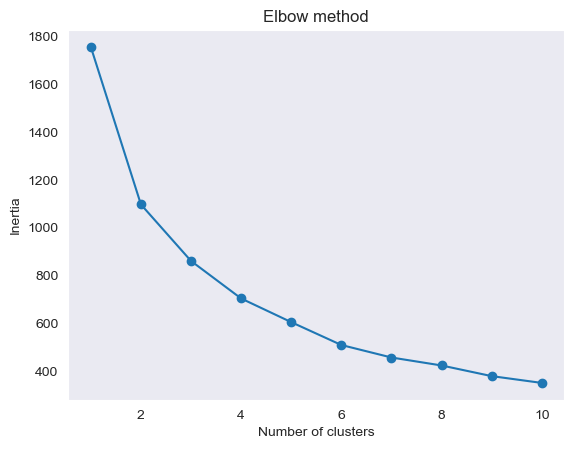

In [210]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=5)
    clusters = kmeans.fit_predict(pca_df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

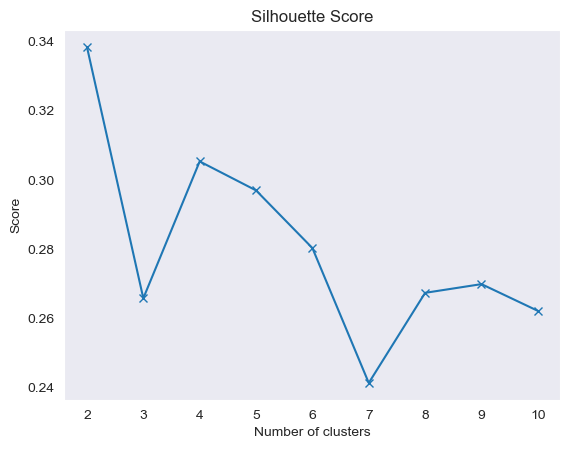

In [212]:
silhouette_scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    clusters = kmeans.fit_predict(pca_df)
    silhouette_scores.append(silhouette_score(pca_df, clusters))

plt.plot(range(2,11), silhouette_scores, marker='x')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

In [214]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_df)
standardized_df["Clusters"] = kmeans.predict(pca_df)

In [216]:
standardized_df['Clusters'].value_counts()

Clusters
2    117
1     97
0     83
Name: count, dtype: int64

IndexError: index 9 is out of bounds for axis 0 with size 9

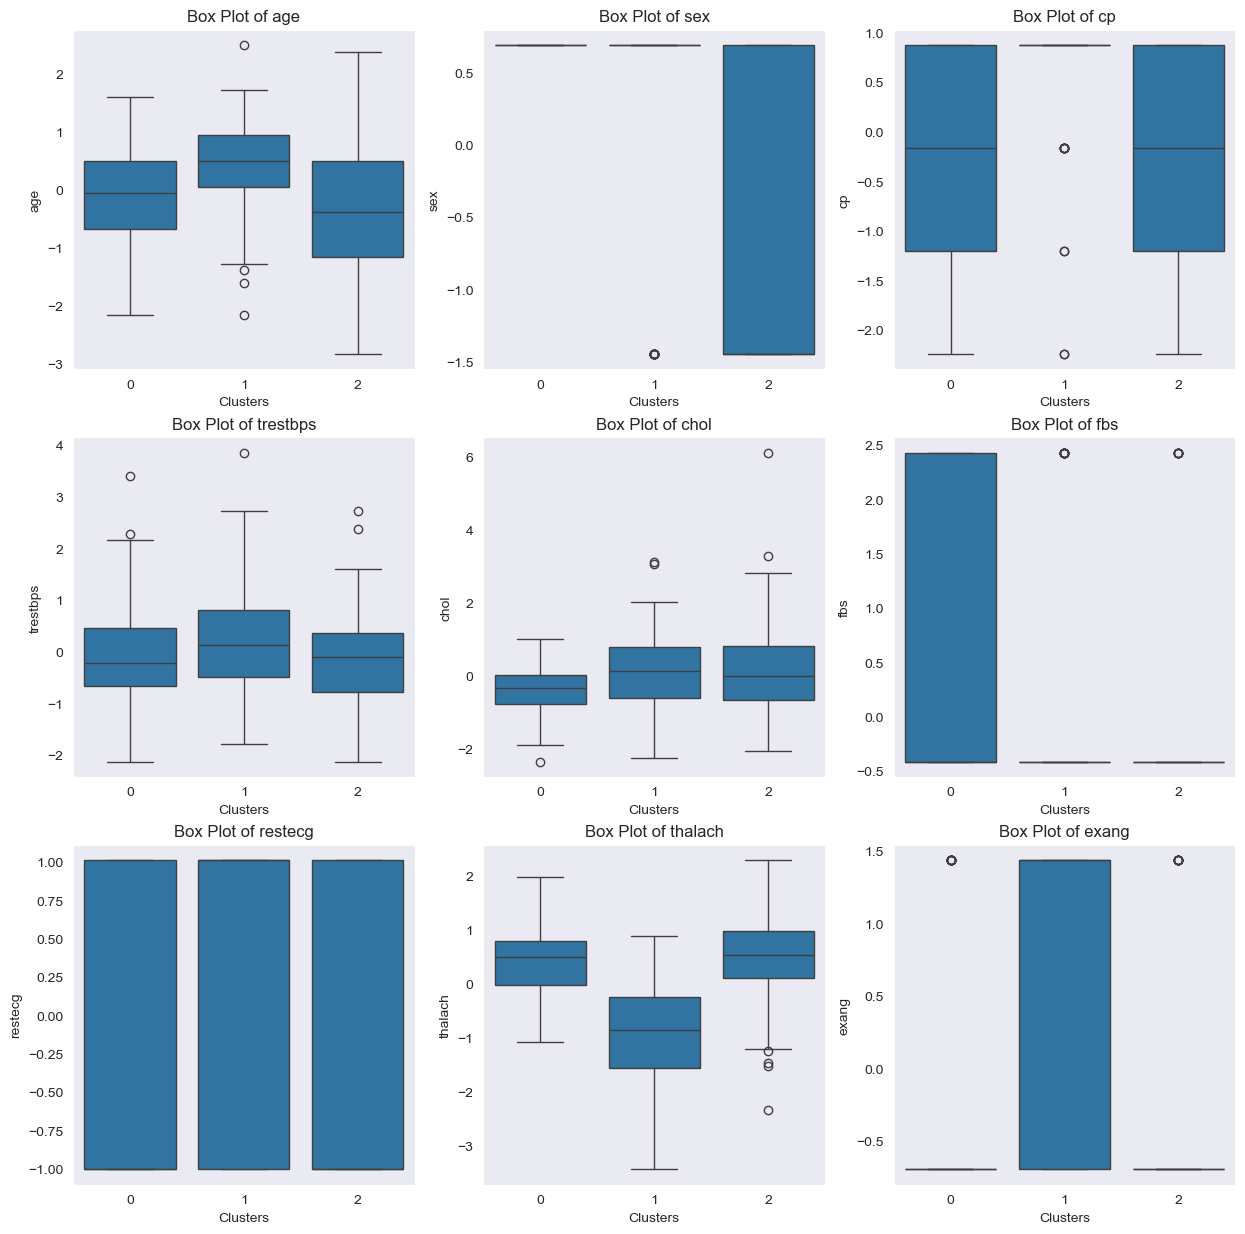

In [218]:
subset = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

axs = axs.flatten()

i = 0

for column in subset:
    sns.boxplot(data=standardized_df, y=column, x=standardized_df["Clusters"], ax = axs[i])
    axs[i].set_title(f'Box Plot of {column}')
    axs[i].set_xlabel('Clusters')
    axs[i].set_ylabel(column)

    i = i + 1

plt.tight_layout()
plt.show()

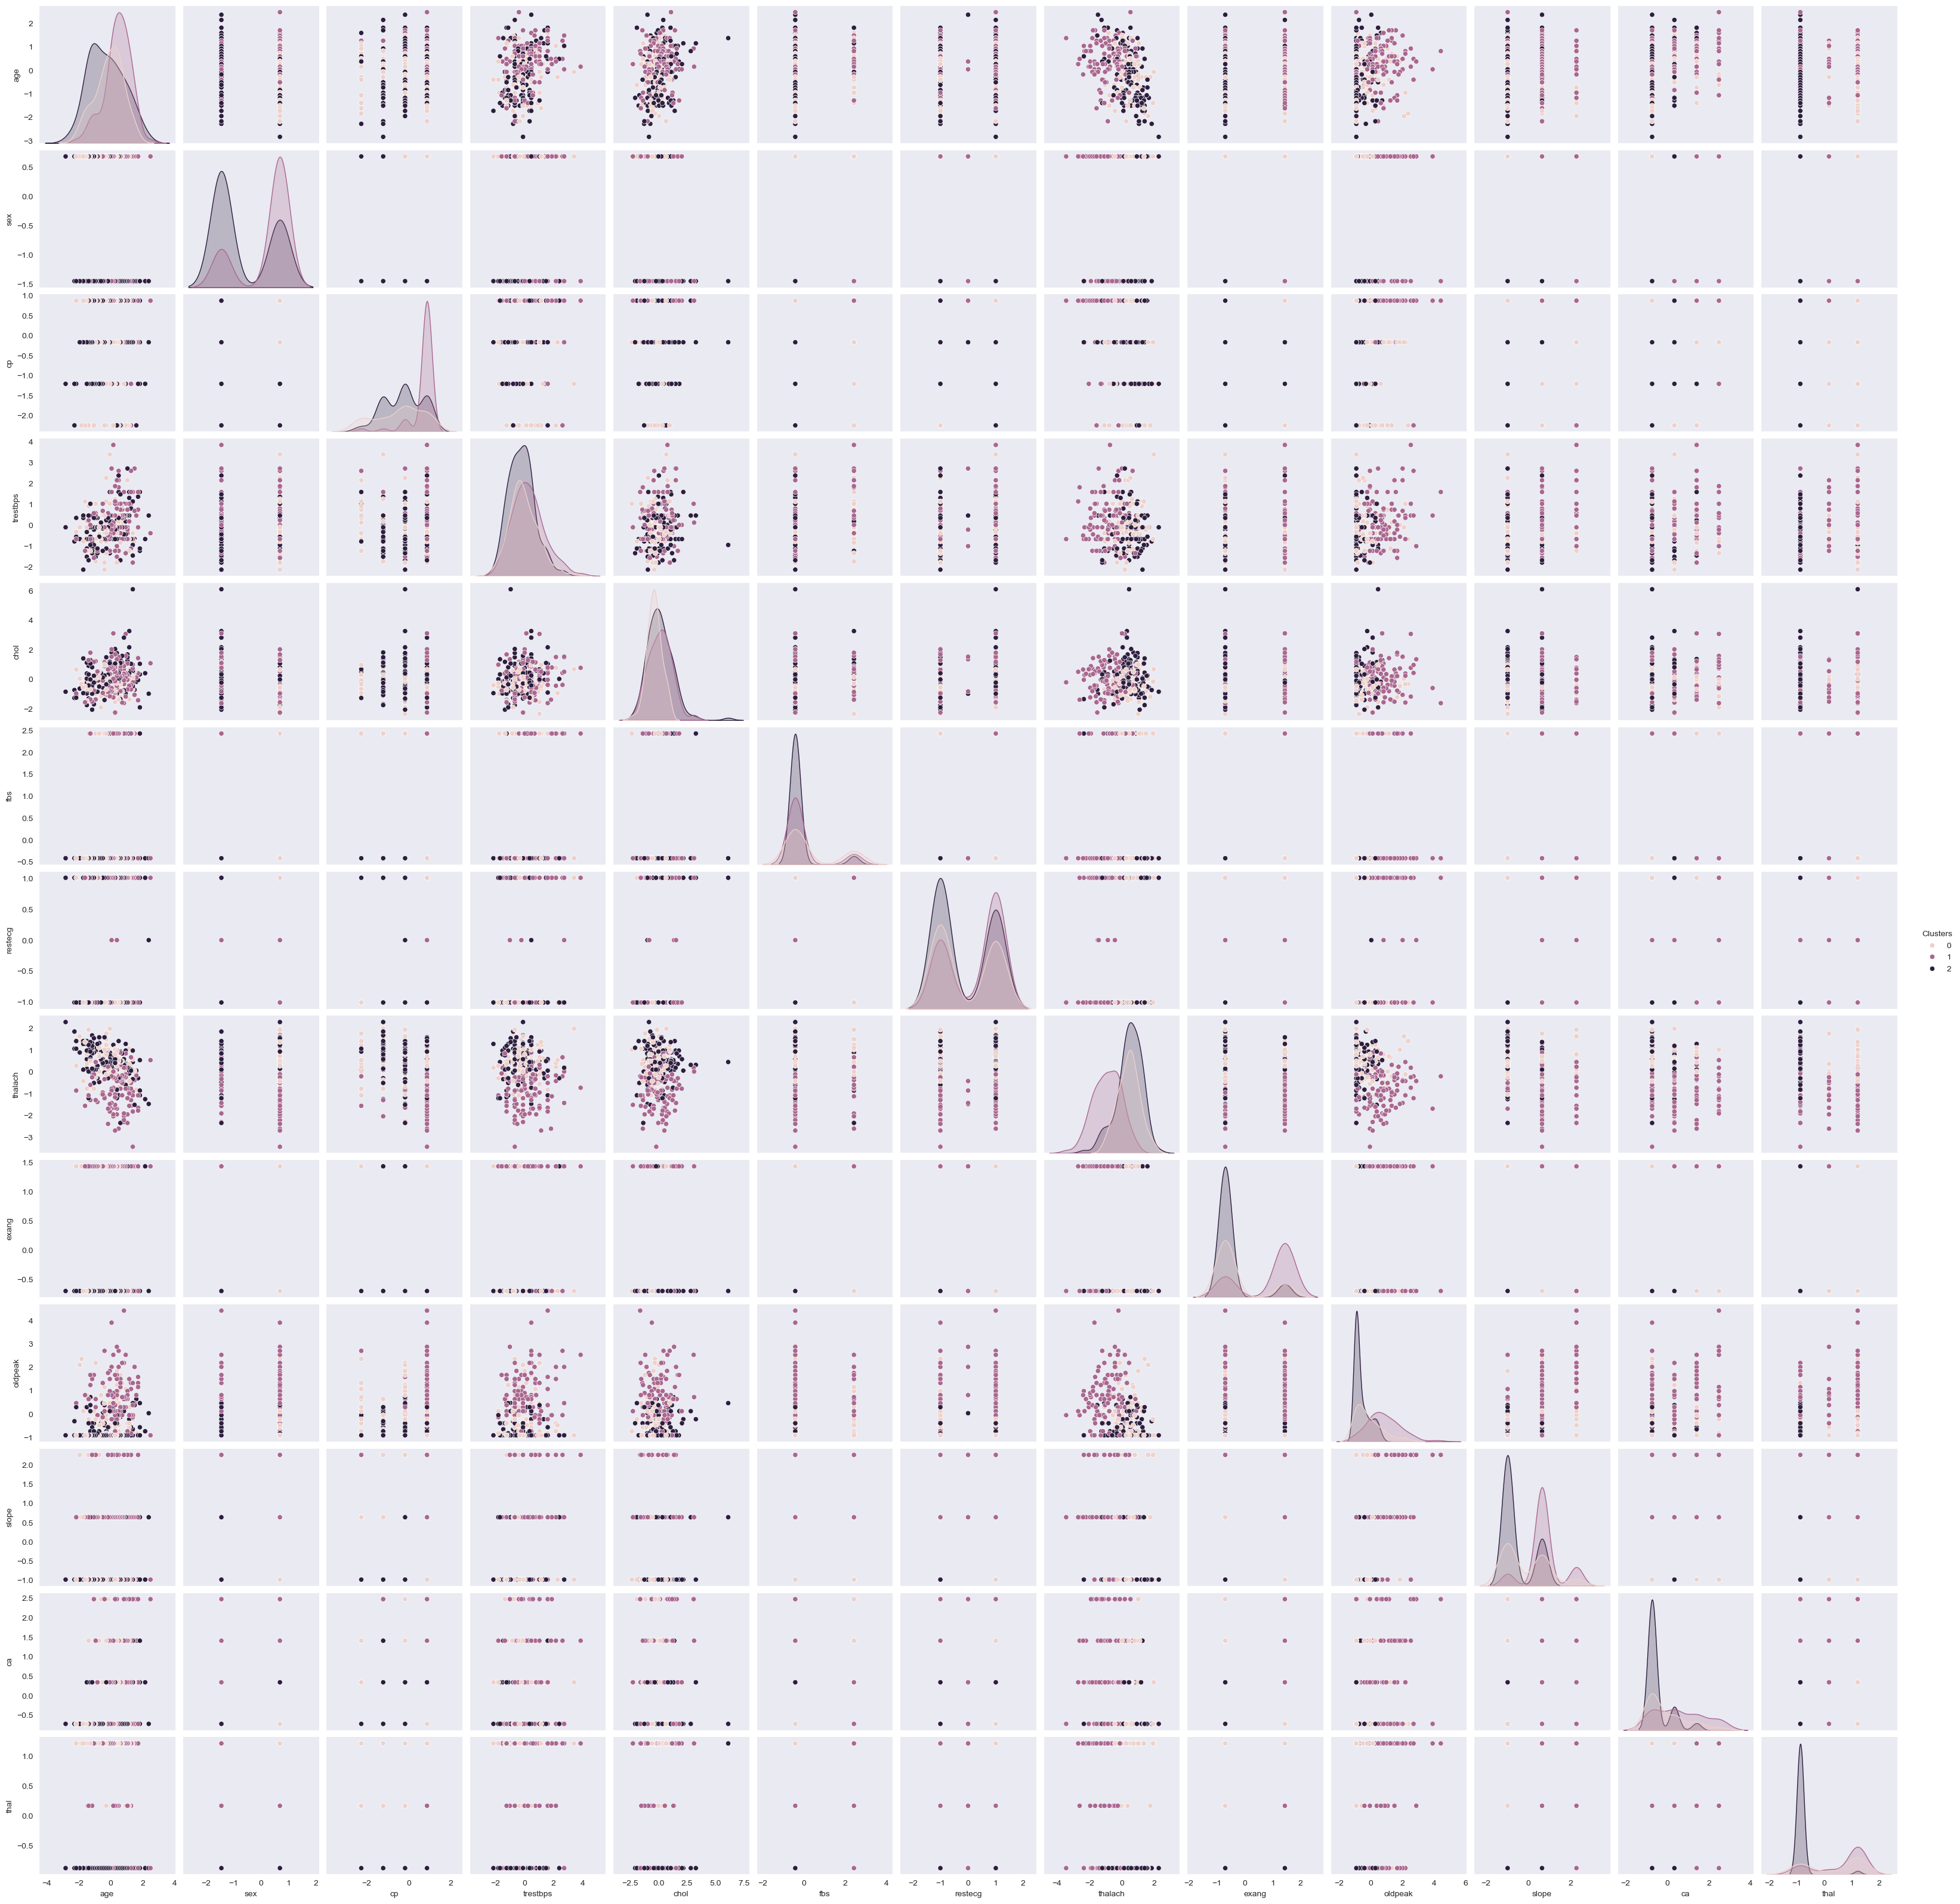

In [220]:
sns.pairplot(standardized_df, hue='Clusters', vars=subset)
plt.show()

In [221]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(pca_df)
standardized_df["Clusters"] = kmeans.predict(pca_df)

In [222]:
standardized_df['Clusters'].value_counts()

Clusters
2    90
1    85
3    63
0    59
Name: count, dtype: int64

IndexError: index 9 is out of bounds for axis 0 with size 9

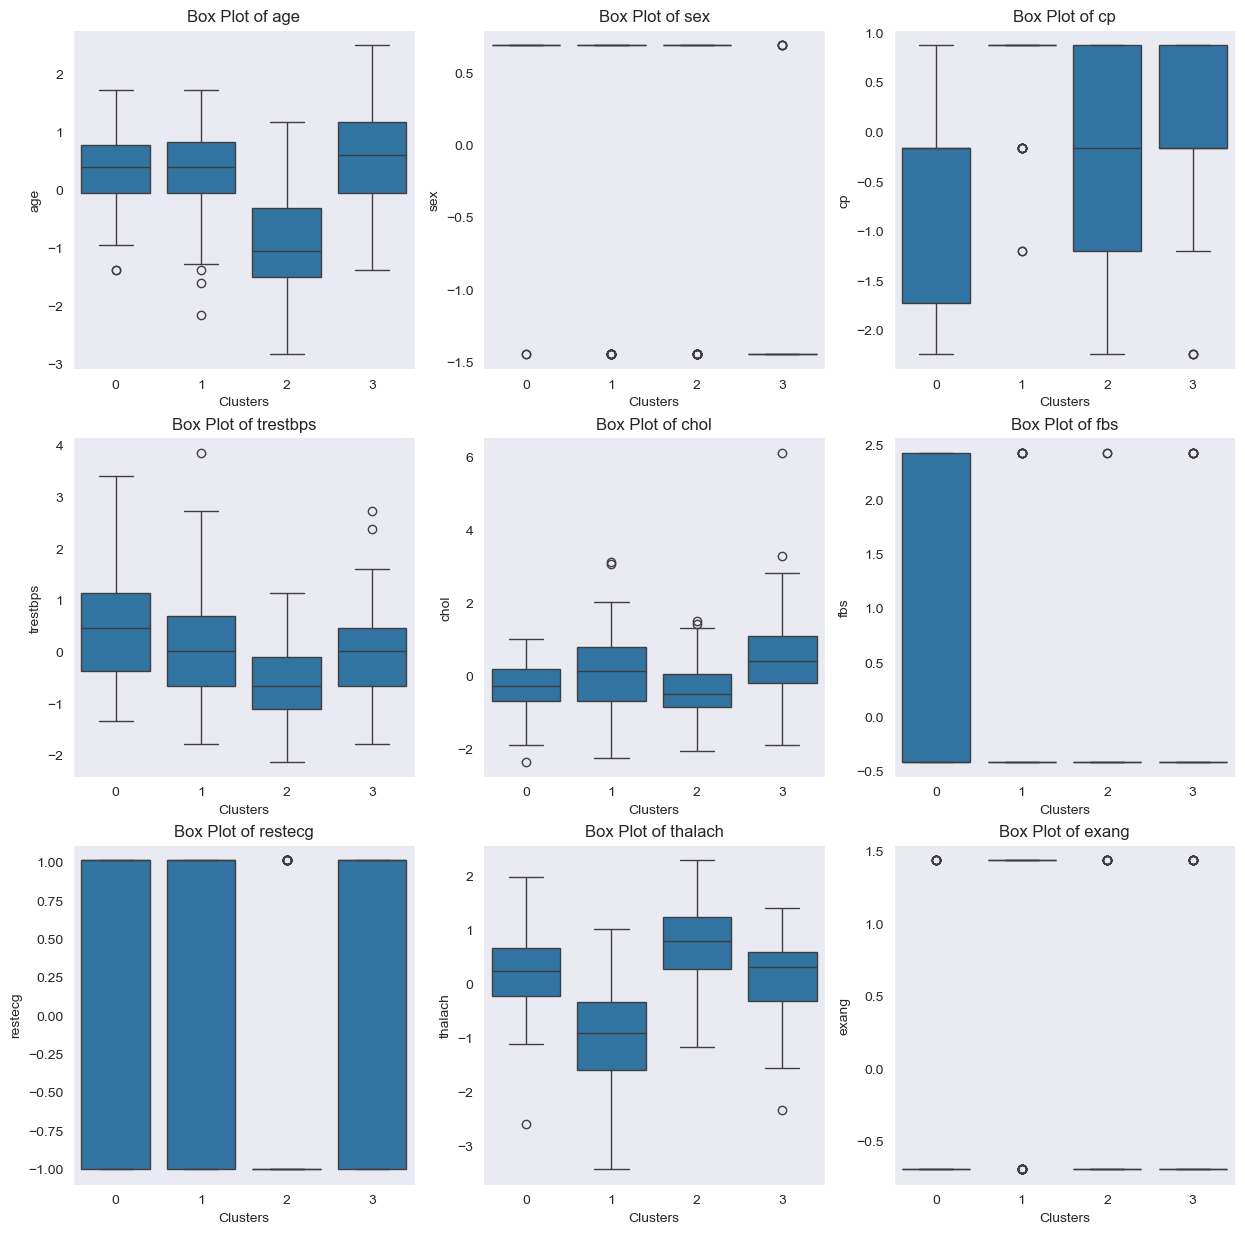

In [223]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

axs = axs.flatten()

i = 0

for column in subset:
    sns.boxplot(data=standardized_df, y=column, x=standardized_df["Clusters"], ax = axs[i])
    axs[i].set_title(f'Box Plot of {column}')
    axs[i].set_xlabel('Clusters')
    axs[i].set_ylabel(column)

    i = i + 1

plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(standardized_df, hue='Clusters', vars=subset)
plt.show()

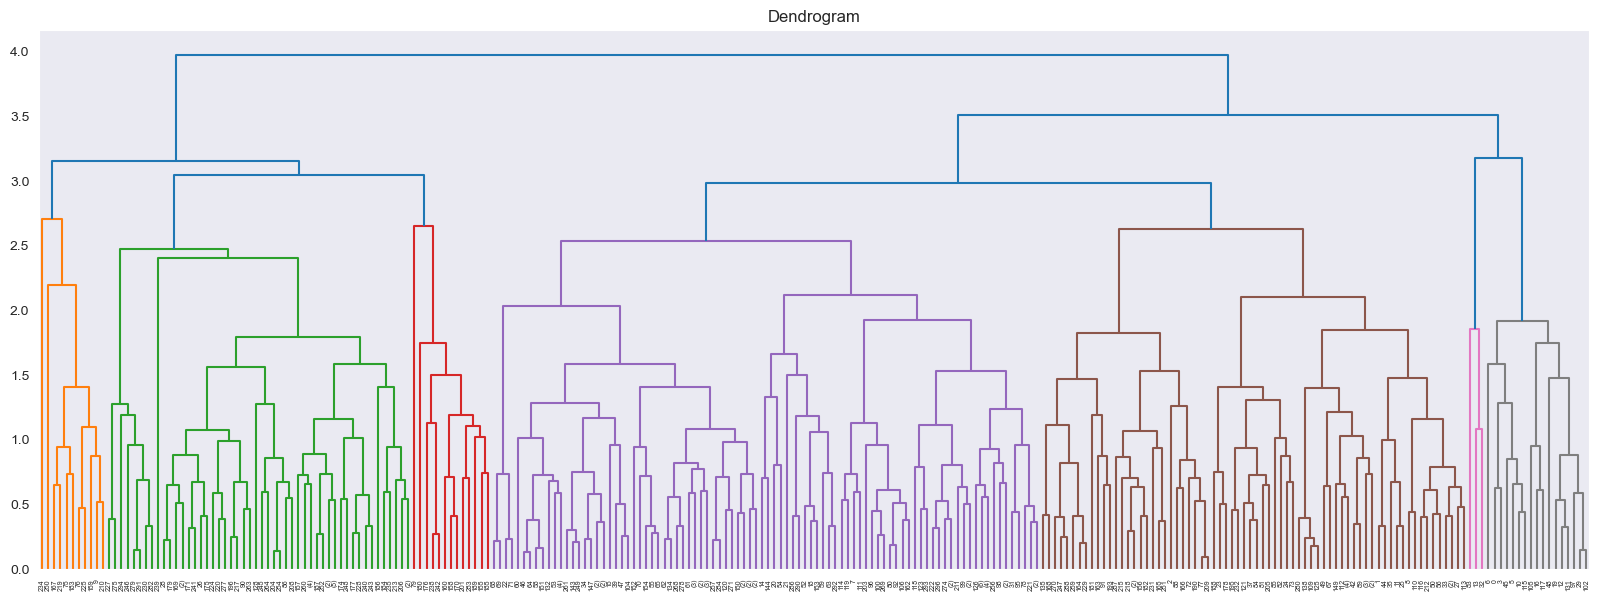

In [226]:
plt.figure(figsize=(20, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(pca_df, method='average'),truncate_mode='level',p =10)
plt.show()

In [227]:
agglo = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')
standardized_df['Clusters'] = agglo.fit_predict(pca_df)

In [230]:
standardized_df['Clusters'].value_counts()

Clusters
0    216
1     81
Name: count, dtype: int64

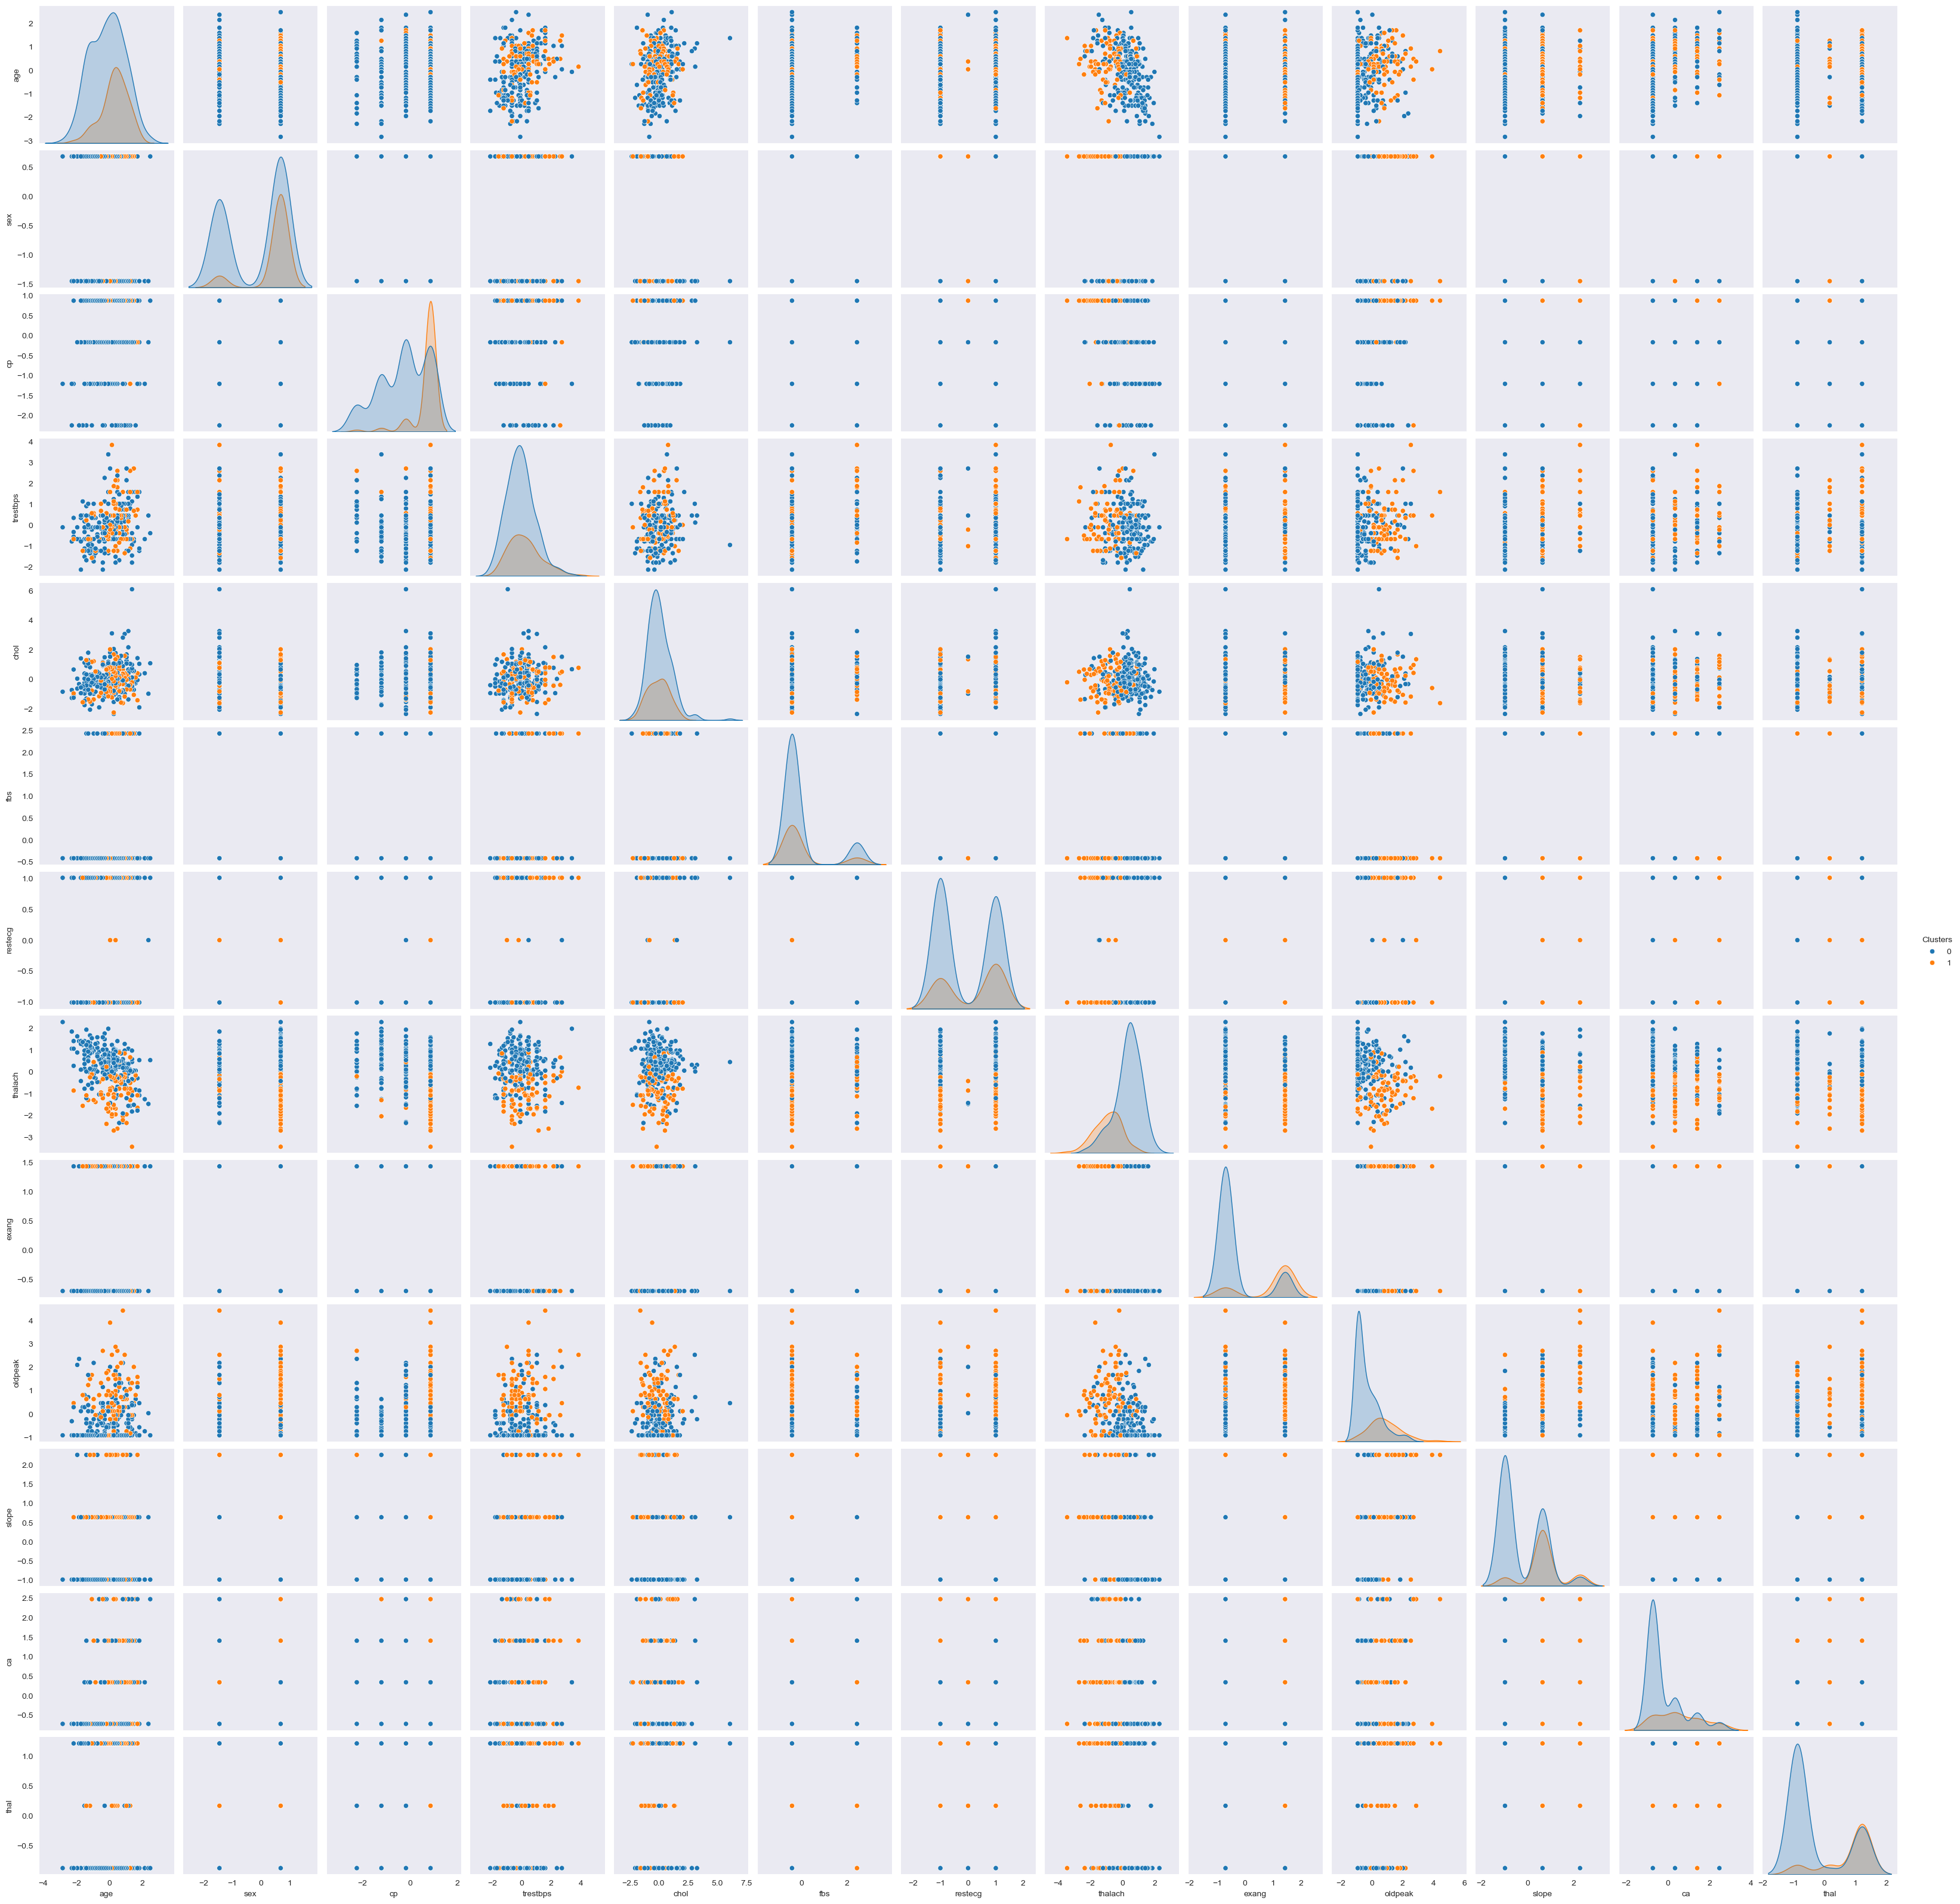

In [232]:
sns.pairplot(standardized_df, hue='Clusters', vars=subset)
plt.show()

IndexError: index 9 is out of bounds for axis 0 with size 9

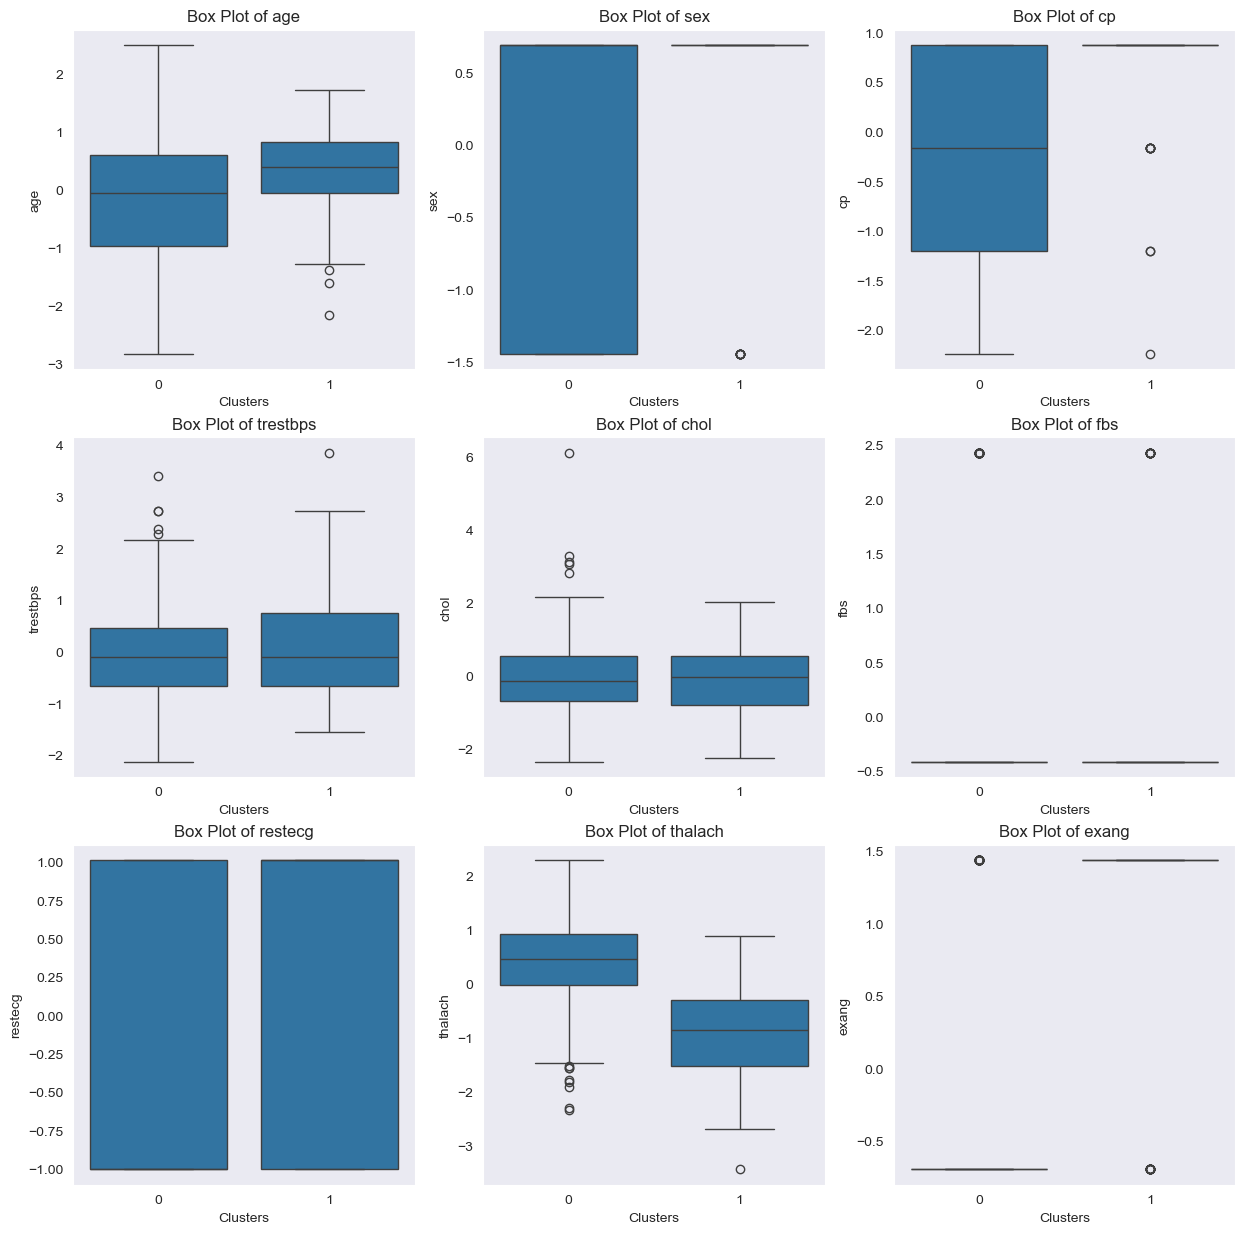

In [233]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

axs = axs.flatten()

i = 0

for column in subset:
    sns.boxplot(data=standardized_df, y=column, x=standardized_df["Clusters"], ax = axs[i])
    axs[i].set_title(f'Box Plot of {column}')
    axs[i].set_xlabel('Clusters')
    axs[i].set_ylabel(column)

    i = i + 1

plt.tight_layout()
plt.show()

In [ ]:
subset = ['thalach', 'age']
sns.pairplot(data=standardized_df, vars=subset, hue='Clusters', diag_kind='kde', corner=True)
plt.show()

In [ ]:
subset = ['thalach', 'chol']
sns.pairplot(data=standardized_df, vars=subset, hue='Clusters', diag_kind='kde', corner=True)
plt.show()